# Review

- fsolve
- SIR like models

In [33]:
from scipy.optimize import minimize, fsolve
import numpy as np
import matplotlib.pyplot as plt

Find the roots of $x^2-1$

In [34]:
print(fsolve(lambda x: x**2 - 1, 0.5))
print(fsolve(lambda x: x**2 - 1, -0.5))

[1.]
[-1.]


## MT1 Q1

$$P_{n+1}-P_{n}=\frac{r}{12}P_{n}+x$$

Regular monthly deposit of $x$

Interest is compounded monthly at the end of each month with an annual rate $r$

$P_{n}$ is the balance at the end of month $n$

In [67]:
def f(P, r, x):
    return P + (r/12)*P + x

In [68]:
f(15000, 0.05, 250)

15312.5

In [69]:
def run(T, P0, r, x):
    Ps = [P0]
    for _ in range(T):
        Ps.append(f(Ps[-1], r, x))
    return Ps

In [70]:
run(12*5, 5000, 0.02, 100)[-1], run(12*5, 5000, 0.02, 100)[-1] - 5000 - 100*12*5, 100*12*5

(11830.130224503268, 830.1302245032675, 6000)

**Question:**

What deposits amount is required to get 1 000 000 \$ in 20 years if the interest rate is 5% and `started from the bottom` (0)?

In [37]:
fsolve(lambda x: run(12*20, 0, 0.05, x)[-1] - 1000000, 1000000)

array([2432.8907255])

In [38]:
# function that takes in number 0 to 11 and returns the month
def m(i):
    return ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][i]

In [39]:
for month, balance in enumerate(run(12*20, 0, 0.05, 2432.9)):
    print(f"{m(month%12)} {2023 + int(month/12)}: {balance:.0f}$")

Jan 2023: 0$
Feb 2023: 2433$
Mar 2023: 4876$
Apr 2023: 7329$
May 2023: 9793$
Jun 2023: 12266$
Jul 2023: 14750$
Aug 2023: 17245$
Sep 2023: 19749$
Oct 2023: 22265$
Nov 2023: 24790$
Dec 2023: 27326$
Jan 2024: 29873$
Feb 2024: 32431$
Mar 2024: 34999$
Apr 2024: 37577$
May 2024: 40167$
Jun 2024: 42767$
Jul 2024: 45378$
Aug 2024: 48000$
Sep 2024: 50633$
Oct 2024: 53277$
Nov 2024: 55932$
Dec 2024: 58598$
Jan 2025: 61275$
Feb 2025: 63963$
Mar 2025: 66662$
Apr 2025: 69373$
May 2025: 72095$
Jun 2025: 74828$
Jul 2025: 77573$
Aug 2025: 80329$
Sep 2025: 83097$
Oct 2025: 85876$
Nov 2025: 88667$
Dec 2025: 91469$
Jan 2026: 94283$
Feb 2026: 97109$
Mar 2026: 99946$
Apr 2026: 102796$
May 2026: 105657$
Jun 2026: 108530$
Jul 2026: 111415$
Aug 2026: 114312$
Sep 2026: 117221$
Oct 2026: 120143$
Nov 2026: 123076$
Dec 2026: 126022$
Jan 2027: 128980$
Feb 2027: 131950$
Mar 2027: 134933$
Apr 2027: 137928$
May 2027: 140936$
Jun 2027: 143956$
Jul 2027: 146988$
Aug 2027: 150034$
Sep 2027: 153092$
Oct 2027: 156163$
Nov

In [50]:
run(12*20, 0, 0.05, 2432.9)[-1] - 2432.9*12*20

416107.8121318007

**Question: EASY** 

What initial balance is required to get 1 000 000 \$ in 20 years if the interest rate is 5% and `started from the bottom` (0)?

**Question: MODERATE** 

What initial balance is required to get 1 000 000 \$ in 20 years if the interest rate is 5%, and depositing 800\$ and `started from the bottom` (0)?

**Question: IMPOSSIBLE** 

What initial balance is required to get 1 000 000 \$ in 20 years if the interest rate is variable, depositing 800\$ and `started from the bottom` (0)?

**QUESTION: NOW WE HERE**

Now we are here, we have made it to 1 million dollrs. What amount can we sustainably withdraw each month for the next 20 years if the interest rate is 5% and `started from the bottom` (0)?

# SIR like models

![started from the bottom](./started_from_the_bottom.png)

$$\frac{dS}{dt} = -\frac{\beta S I}{N}$$

$$\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

$S_0 = 0.99$

$I_0 =  0.01$ 

$R_0 = 0$

$\beta = 0.2$ and $\gamma = 0.1$

In [54]:
beta = 0.2
gamma = 0.1

def dS(S, I):
    return -beta*S*I

def dI(S, I):
    return beta*S*I - gamma*I

def dR(I):
    return gamma*I

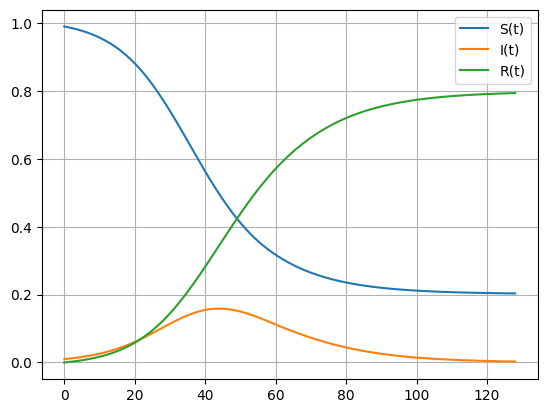

In [55]:
from scipy.integrate import solve_ivp

def SIR(t, y):
    S, I, R = y
    return [dS(S, I), dI(S, I), dR(I)]

y0 = [0.99, 0.01, 0]
t = np.linspace(0, 128, 1000)

sol = solve_ivp(SIR, [0, 128], y0, t_eval=t)

plt.figure()
plt.plot(sol.t, sol.y[0], label='S(t)')
plt.plot(sol.t, sol.y[1], label='I(t)')
plt.plot(sol.t, sol.y[2], label='R(t)')
plt.grid()
plt.legend()

# these two code cells are very flexible and can easily be modified to change the model.

*sympy: symbolic python*

scipy: scientific python

numpy: numerical python

matplotlib: plotting python

pandas: data analysis python

In [59]:
from sympy import symbols, solve, Eq, simplify, lambdify

In [60]:
x, y = symbols('x y')

solve([Eq(x + y, 1), Eq(x - y, 0)], [x, y])

{x: 1/2, y: 1/2}

In [61]:
# example using simplify and lambdify

x, y = symbols('x y')

solve([Eq(x**2 + y**2, 1), Eq(x - y, 0)], [x, y])

simplify(x**2 + y**2)

f = lambdify([x, y], x**2 + y**2)

f(1, 2)

5

In [62]:
import os 

os.system('ls')

Lab-27-Oct-30.ipynb
Lab-28-Oct-30.ipynb
Lab-29-Oct-31
Lab-30-Nov-1.ipynb
started_from_the_bottom.png
sym.py


0

In [63]:
os.system('pwd')

/Users/jackbullen/Math-248/Labs/Week 10


0

In [65]:
os.system('python3 sym.py')

Matrix: Matrix([[-N*P*m/(N + 1) + N*(1 - N/K)], [N*P*m/(N + 1) - P*c]])
Derivative Matrix([[N*P*m/(N + 1)**2 - P*m/(N + 1) + 1 - 2*N/K, -N*m/(N + 1)], [-N*P*m/(N + 1)**2 + P*m/(N + 1), N*m/(N + 1) - c]])
Equilibrium points: [(0, 0), (K, 0), (-c/(c - m), (-K*c + K*m - c)/(K*(c - m)**2))]
Matrix([[1, 0], [0, -c]])
Matrix([[-1, -K*m/(K + 1)], [0, K*m/(K + 1) - c]])
Matrix([[1 - c*m*(-K*c + K*m - c)/(K*(c - m)**3*(-c/(c - m) + 1)**2) + 2*c/(K*(c - m)) - m*(-K*c + K*m - c)/(K*(c - m)**2*(-c/(c - m) + 1)), c*m/((c - m)*(-c/(c - m) + 1))], [c*m*(-K*c + K*m - c)/(K*(c - m)**3*(-c/(c - m) + 1)**2) + m*(-K*c + K*m - c)/(K*(c - m)**2*(-c/(c - m) + 1)), -c*m/((c - m)*(-c/(c - m) + 1)) - c]])


0